# **Exercícios para entregar: Classificação - Introdução à Ciência de Dados**
Amanda Caroline de Oliveira Pires

12559090

# **Bibliotecas e Funções**

## **Bibliotecas necessárias:**

In [19]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as skdata

## **Funções necessárias:**

In [45]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from matplotlib import pyplot
from pandas import DataFrame
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import linear_model
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from numpy.lib import index_tricks
from sklearn import metrics

**1–** Considere as bases Iris e Vehicle. Em um mesmo gráfico, mostre a acurácia em função de k
para o método k-vizinhos.

In [74]:
# Carregando as bases de dados

Iris = pd.read_csv('/content/iris.csv', header=(0))
#display(Iris)

Iris = Iris.to_numpy()
nrow,ncol = Iris.shape
y = Iris[:,-1]
X = Iris[:,0:ncol-1]

In [75]:
# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [76]:
print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Desvio Padrao: [1. 1. 1. 1.]


In [77]:
# Definindo conjunto de teste e de treino
p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Realizando a classificação pelo método k-vizinhos 

k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 


# Calculando a acurácia 
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 1.0


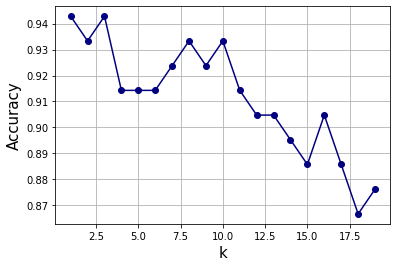

Melhor k: 1


In [78]:
nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo', color = '#000080')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.grid(True)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Melhor k:', best_k)

In [25]:
# carregando dados vehicle

Vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))
#display(Vehicle)

# Implementando método k-vizinhos para base Vehicle

Vehicle = Vehicle.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(Vehicle[Vehicle.columns[-1]]), dtype=str)  

nrow, ncol = Vehicle.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(Vehicle.columns)


Vehicle = Vehicle.to_numpy()
nrow,ncol = Vehicle.shape
y = Vehicle[:,-1]
X = Vehicle[:,0:ncol-1]


# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Matriz de atributos: Número de linhas: 846  colunas:  19
Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
# Definindo conjunto de teste e de treino

p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Realizando a classificação pelo método k-vizinhos 

k = 5 # numero de vizinhos
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test) 

Accuracy: 0.7677165354330708


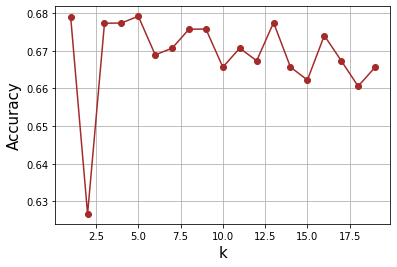

Melhor k: 5


In [28]:
# Calculando a acurácia 
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

nkf1 = 5 #number of folds
vk1 = [] # armazena os valores de k
vscore1 = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf1)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore1.append(cv['test_score'].mean()) 
    vk1.append(k)

plt.plot(vk1, vscore1, '-bo', color = '#A52A2A')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.grid(True)
plt.show(True)
best_k = np.argmax(vscore1)+1
print('Melhor k:', best_k)

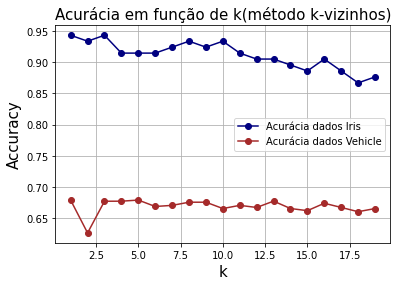

In [48]:
# Comparacão dois gráficos 

plt.plot(vk, vscore, '-bo', color='#000080', label='Acurácia dados Iris')
plt.plot(vk1, vscore1, '-bo', color='#A52A2A', label='Acurácia dados Vehicle')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.grid(True)
plt.title('Acurácia em função de k(método k-vizinhos)', fontsize = 15)
plt.legend(['Acurácia dados Iris', 'Acurácia dados Vehicle'], loc= 'best')
plt.show(True)



**2–** Considere os dados gerados com o código abaixo e obtenha as regiões de separação usando
o método k-vizinhos para diferentes valores de k. Compare com as regiões obtidas usando o 
método regressão logística.

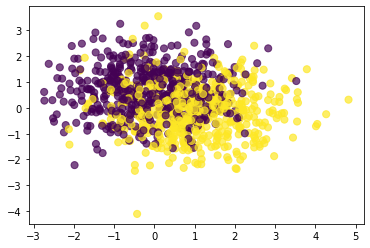

In [47]:
plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

Classes: [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
Classification: 1


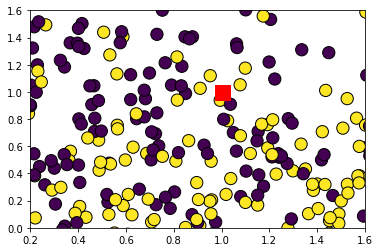

In [48]:
def knn(x_train, y_train, x_test, k):
    distances = [] #lista que armazena as distâncias
    x1 = x_test # elemento a ser classificado
    for x2 in x_train: # distancia entre a observacao elementos no conjunto de teste
        dist = distance.euclidean(x1,x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(1,20):
        ind = np.argmin(distances) #elemento no conjunto de teste mais proximo
        #print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances) 
        indices.append(ind)
        cl.append(y_train[ind]) #guarda a classe
    print("Classes:",cl)
    classification = statistics.mode(cl)# encontra a classe
    return classification

k=[] # numero de vizinhos
x_train = X
y_train = y
x_test = np.array([1,1])
# realiza a classificacao
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)
# mostra os dados
plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="Red")
plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('knn.eps')

plt.show(True)

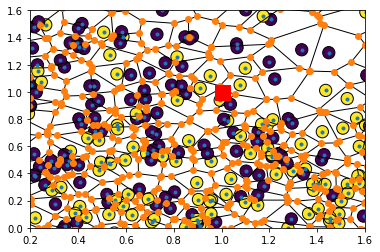

In [49]:
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="Red")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('voronoi.eps')
plt.show()

Selecionando dois atributos, podemos visualizar a região de decisão.

Para o método k-vizinhos mais próximos:

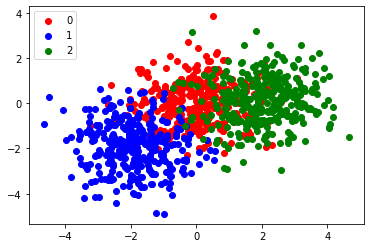

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


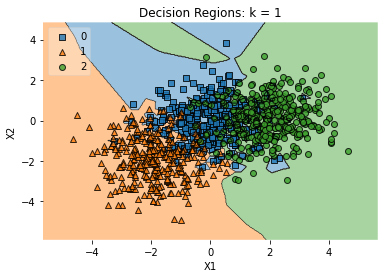

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


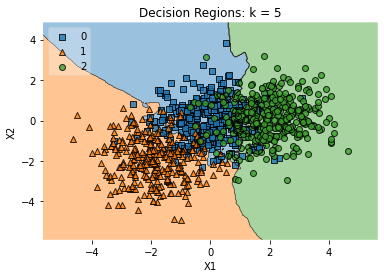

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


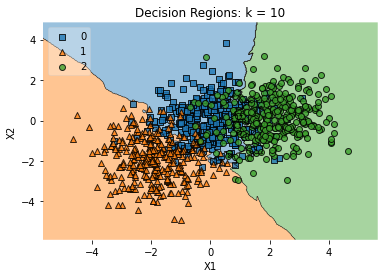

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


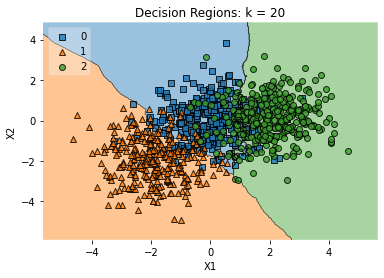

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


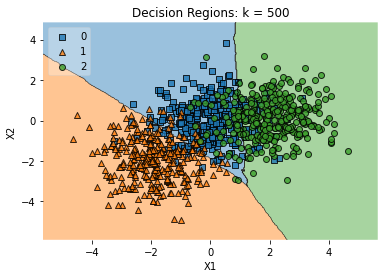

In [54]:
n_samples = 1000
# centro dos grupos
centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e coloridos de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
plt.show()

# mostra as regiões de separação para diversos valores de k
vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    #plt.savefig('knn_' + str(k)+'.eps')
    plt.show()

## Método Regressão logística

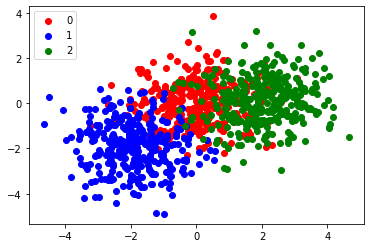

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


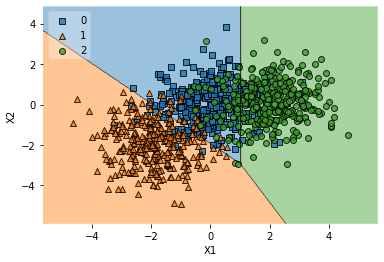

In [56]:
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('plot_ex.eps')
plt.legend()
plt.show()

# Training a classifier
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X, y)
# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)
plt.xlabel('X1')
plt.ylabel('X2')
#plt.savefig('logistic-region.eps')
plt.show()

Percebe-se que pelo método de regressão logística as regiões de separação são muito bem definidas, enquanto que para o modelo Knn o gráfico que apresenta uma melhor região de separação é quando k é igual a 20.

**3–** Classifique as bases Iris e Vehicle usando regressão logística e compare com o método k-vizinhos

In [64]:
# Para a base Iris

Iris = pd.read_csv('/content/iris.csv', header=(0))
Iris = Iris.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(Iris[Iris.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", Iris.shape)
attributes = list(Iris.columns)

Número de linhas e colunas na matriz de atributos: (150, 5)


Convertendo para o formato Numpy e normalizando:

In [65]:
Iris = Iris.to_numpy()
nrow,ncol = Iris.shape
y = Iris[:,-1]
X = Iris[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [66]:
p = 0.7  # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística:

In [67]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.9238095238095239


In [69]:
# Para a base Vehicle

Vehicle = pd.read_csv('/content/Vehicle.csv', header=(0))
Vehicle = Vehicle.dropna(axis='rows') #remove NaN
# armazena os nomes das classes
classes = np.array(pd.unique(Vehicle[Vehicle.columns[-1]]), dtype=str)  

print("Número de linhas e colunas na matriz de atributos:", Vehicle.shape)
attributes = list(Vehicle.columns)

Número de linhas e colunas na matriz de atributos: (846, 19)


Convertendo para o formato Numpy e normalizando:

In [70]:
Vehicle = Vehicle.to_numpy()
nrow,ncol = Vehicle.shape
y = Vehicle[:,-1]
X = Vehicle[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Selecionamos os conjunto de treinamento e teste usando o método hold-out.

In [71]:
p = 0.7 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Realizando a classificação por regressão logística:

In [72]:
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.7757166947723441


Utilizando o método Knn, obtivemos a acurácia de 1.0 para os dados da Iris, enquanto que pelo método de regressão logística a acurácia foi de aproximadamente 0.92.
A base Vehicle apresentou acurácia de 0.77 com o Knn e 0.77 pela regressão logística.

